# Data acquisition

In [33]:
import pandas as pd

In [34]:
data = pd.read_excel('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/dataset.xlsx')

In [35]:
data = data.reset_index(drop=True)

In [36]:
data.head(25)

,Unnamed: 0,text,label
0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax
1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid
2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax
3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid
4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax
5,5,Not all photos uploaded by the source claim to...,hoax
6,6,Hasil periksa fakta Riza Dwi (Anggota Tim Kali...,hoax
7,7,China menerapkan pembatasan perjalanan ke luar...,valid
8,8,Beragam cara mengantisipasi penyebaran wabah P...,valid
9,9,Pasien berusia 9 tahun suspek hepatitis mister...,valid


In [40]:
data.iloc[836,:]

Unnamed: 0     236
text             0
label         hoax
Name: 836, dtype: object

In [42]:
data = data.drop(836,axis=0)

In [45]:
data = data.reset_index(drop=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1199 non-null   int64 
 1   text        1199 non-null   object
 2   label       1199 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [47]:
data.groupby('label').count()

,Unnamed: 0,text
label,,
hoax,599,599
valid,600,600


In [48]:
cat = []
for i in range(len(data)):
    if data.label[i] == 'valid':
        cat.append(1)
    else:
        cat.append(0)

In [49]:
data['cat'] = cat
data.head()

,Unnamed: 0,text,label,cat
0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax,0
1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid,1
2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax,0
3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid,1
4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1199 non-null   int64 
 1   text        1199 non-null   object
 2   label       1199 non-null   object
 3   cat         1199 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.6+ KB


# Data exploring

In [51]:
# melihat apakah terdapat missing value
data.isna().sum()

Unnamed: 0    0
text          0
label         0
cat           0
dtype: int64

# Data preprocessing

## Case folding

In [69]:
import re

In [70]:
# membuat fungsi case folding
def casefolding(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'[-+]?[0-9]+','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n',' ',text)
    text = text.strip()
    return text

In [54]:
# contoh
raw_text = data.text[1]
text_casefolding = casefolding(raw_text)

print('original text:',raw_text)
print('')
print('casefolding text:',text_casefolding)

original text: Perdana Menteri (PM) Selandia Baru Jacinda Ardern dinyatakan positif terinfeksi virus Corona.

casefolding text: perdana menteri pm selandia baru jacinda ardern dinyatakan positif terinfeksi virus corona


##  Word Normalization

In [55]:
# download corpus akronim
#!python -m wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [71]:
key_norm = pd.read_csv('key_norm.csv')
key_norm.head(10)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
5,6,acra,acara
6,7,acrany,acaranya
7,8,acrnya,acaranya
8,9,action,aksi
9,10,active,aktif


In [57]:
key_norm.tail()

,_id,singkat,hasil
3715,3716,ywdah,ya sudah
3716,3717,ywdh,ya sudah
3717,3718,ywdhlh,ya sudahlah
3718,3719,ywis,ya sudah
3719,3720,rp,rupiah


In [72]:
# membuat fungsi untuk menormalisasi teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Stop removal

In [59]:
#import nltk
#nltk.download('stopwords')

In [73]:
from nltk.corpus import stopwords

In [74]:
stopwords_ind = stopwords.words('indonesian')

In [62]:
len(stopwords_ind)

758

In [75]:
# membuat fungsi untuk remove stopwords
def remove_stopwords(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [64]:
# contoh
raw_text = data.text[1]
text_casefolding = casefolding(raw_text)
text_clean = remove_stopwords(text_casefolding)

print('original text:',raw_text)
print('')
print('casefolding text:',text_casefolding)
print('')
print('stopwords removal:',text_clean)

original text: Perdana Menteri (PM) Selandia Baru Jacinda Ardern dinyatakan positif terinfeksi virus Corona.

casefolding text: perdana menteri pm selandia baru jacinda ardern dinyatakan positif terinfeksi virus corona

stopwords removal: perdana menteri pm selandia jacinda ardern dinyatakan positif terinfeksi virus corona


## Stemming

In [65]:
#!python -m pip install Sastrawi

In [76]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [77]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

## pipline data preprocessing

In [78]:
# membuat fungsi text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [69]:
%%time
data['clean_teks'] = data['text'].apply(text_preprocessing)

CPU times: total: 6min 28s
Wall time: 6min 30s


In [70]:
data.head()

,Unnamed: 0,text,label,cat,clean_teks
0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax,0,kamis agustus wib simak coronavirusfacts factc...
1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid,1,perdana menteri pm selandia jacinda ardern nya...
2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax,0,hasil periksa fakta indri pramesti widyaningru...
3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid,1,plt dinas didik klaten yunanta izin sekolah ad...
4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax,0,hasil periksa fakta novita kusuma wardhani ins...


In [71]:
data.duplicated(subset=['clean_teks']).any()

True

In [72]:
data_baru = data.drop_duplicates(subset=['clean_teks'],keep='first')
data = data_baru.reset_index(drop=True)

In [73]:
data.to_excel('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/data_scraping_clean.xlsx')

# Feature engineering

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/data_scraping_clean.xlsx')

In [3]:
data.duplicated(subset=['clean_teks']).any()

False

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,text,label,cat,clean_teks
0,0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax,0,kamis agustus wib simak coronavirusfacts factc...
1,1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid,1,perdana menteri pm selandia jacinda ardern nya...
2,2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax,0,hasil periksa fakta indri pramesti widyaningru...
3,3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid,1,plt dinas didik klaten yunanta izin sekolah ad...
4,4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax,0,hasil periksa fakta novita kusuma wardhani ins...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1134 non-null   int64 
 1   Unnamed: 0    1134 non-null   int64 
 2   text          1134 non-null   object
 3   label         1134 non-null   object
 4   cat           1134 non-null   int64 
 5   clean_teks    1134 non-null   object
dtypes: int64(3), object(3)
memory usage: 53.3+ KB


In [6]:
data['label'].unique()

array(['hoax', 'valid'], dtype=object)

In [7]:
data.groupby('label').count()

,Unnamed: 0.1,Unnamed: 0,text,cat,clean_teks
label,,,,,
hoax,558,558,558,558,558
valid,576,576,576,576,576


## Feature extraction

### TFIDF

In [8]:
x = data['clean_teks']
y = data['cat']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vec_tf_idf = TfidfVectorizer(ngram_range = (1,1))
vec_tf_idf.fit(x)

x_tf_idf = vec_tf_idf.transform(x)

In [11]:
vec_tf_idf.vocabulary_

{'kamis': 1538,
 'agustus': 42,
 'wib': 3837,
 'simak': 3199,
 'coronavirusfacts': 630,
 'factcheck': 927,
 'perdana': 2583,
 'menteri': 2120,
 'pm': 2662,
 'selandia': 3101,
 'jacinda': 1394,
 'ardern': 187,
 'nyata': 2362,
 'positif': 2696,
 'infeksi': 1312,
 'virus': 3784,
 'corona': 628,
 'hasil': 1168,
 'periksa': 2588,
 'fakta': 936,
 'indri': 1307,
 'pramesti': 2716,
 'widyaningrum': 3843,
 'anggota': 138,
 'komisariat': 1709,
 'mafindo': 1982,
 'universitas': 3714,
 'gunadarma': 1112,
 'puisi': 2775,
 'modern': 2179,
 'tulis': 3645,
 'catherine': 564,
 'omeara': 2400,
 'plt': 2660,
 'dinas': 744,
 'didik': 736,
 'klaten': 1691,
 'yunanta': 3889,
 'izin': 1392,
 'sekolah': 3090,
 'ada': 23,
 'studi': 3309,
 'wisata': 3853,
 'daerah': 649,
 'ppkm': 2707,
 'novita': 2343,
 'kusuma': 1819,
 'wardhani': 3820,
 'institut': 1335,
 'ilmu': 1276,
 'sosial': 3267,
 'politik': 2675,
 'jakarta': 1404,
 'informasi': 1317,
 'salah': 3001,
 'dokter': 790,
 'spesialis': 3278,
 'sakit': 2998,
 

In [12]:
len(vec_tf_idf.get_feature_names())

C:\Users\Rizky Adi Pratama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3908

In [13]:
x1 = x_tf_idf.toarray()
data_tf_idf = pd.DataFrame(x1,columns=vec_tf_idf.get_feature_names())
data_tf_idf.head(10)

,aa,abad,abai,abang,abar,abdul,abdullah,abhynewscom,aboe,aborigin,...,zero,zerocovid,zhang,zhejiang,zhuhai,zimbabwe,zon,zoo,zulkiefliemansyah,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.298831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## feature Selection

In [14]:
import numpy as np

In [15]:
x_train = np.array(data_tf_idf)
y_train = np.array(y)

In [16]:
x_train.shape

(1134, 3908)

In [17]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
chi2_features = SelectKBest(chi2, k=1000)

x_kbest_features = chi2_features.fit_transform(x_train,y_train)

In [20]:
print('original feature number:',x_train.shape[1])
print('reduced feature number:',x_kbest_features.shape[1])

original feature number: 3908
reduced feature number: 1000


In [21]:
data_new = pd.DataFrame(chi2_features.scores_,columns=['nilai'])

In [22]:
data_new.head(10)

,nilai
0,0.281451
1,0.279321
2,0.892009
3,0.215996
4,0.286691
5,1.273515
6,0.325291
7,0.351628
8,0.471190
9,0.298664


In [23]:
features = vec_tf_idf.get_feature_names()
data_new['fitur'] = features

C:\Users\Rizky Adi Pratama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
data_new.head(10)

,nilai,fitur
0,0.281451,aa
1,0.279321,abad
2,0.892009,abai
3,0.215996,abang
4,0.286691,abar
5,1.273515,abdul
6,0.325291,abdullah
7,0.351628,abhynewscom
8,0.471190,aboe
9,0.298664,aborigin


In [25]:
data_new.sort_values(by='nilai',ascending=False)

,nilai,fitur
936,3.969856e+01,fakta
2588,2.766364e+01,periksa
1168,2.619844e+01,hasil
1317,2.096498e+01,informasi
3714,1.817437e+01,universitas
...,...,...
1198,1.049329e-05,hibur
738,5.921719e-06,digital
2903,1.150511e-06,reservasi
1887,2.249592e-07,lemak


In [26]:
# menampilkan fitur- fitur yang terpilih berdasarkan nilai k tertinggi
mask = chi2_features.get_support()
new_feature = []
for bool,f in zip(mask,features):
    if bool:
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

['abai',
 'abdul',
 'acara',
 'adenovirus',
 'adi',
 'adil',
 'adu',
 'agama',
 'agustus',
 'ahli',
 'ahmad',
 'aidit',
 'aids',
 'airbus',
 'airlangga',
 'aisyah',
 'ajak',
 'ajang',
 'akibat',
 'aku',
 'akun',
 'akut',
 'al',
 'alami',
 'alas',
 'alat',
 'aliansi',
 'alir',
 'ambil',
 'amerika',
 'ampel',
 'an',
 'anak',
 'analis',
 'ancam',
 'ancol',
 'and',
 'andika',
 'andini',
 'anggap',
 'anggar',
 'anggota',
 'anggur',
 'angkot',
 'angola',
 'ani',
 'anies',
 'anjlok',
 'antibodi',
 'antisipasi',
 'apa',
 'arab',
 'arabia',
 'aramco',
 'ardi',
 'area',
 'ari',
 'arie',
 'arief',
 'ariel',
 'armando',
 'arsul',
 'arti',
 'artikel',
 'aryalasa',
 'as',
 'asal',
 'asasi',
 'aseanas',
 'asli',
 'asri',
 'atap',
 'atas',
 'awas',
 'ayu',
 'azis',
 'aziz',
 'baca',
 'bagi',
 'bahas',
 'bahri',
 'baik',
 'balap',
 'baliho',
 'balkonjazz',
 'ban',
 'bandara',
 'bandung',
 'bangun',
 'bantah',
 'banyuwangi',
 'barel',
 'barubaru',
 'baswedan',
 'bawa',
 'bawang',
 'bawaslu',
 'bayi',
 '

In [27]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_tf_idf.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'agustus': 42,
 'factcheck': 927,
 'perdana': 2583,
 'nyata': 2362,
 'infeksi': 1312,
 'virus': 3784,
 'hasil': 1168,
 'periksa': 2588,
 'fakta': 936,
 'indri': 1307,
 'pramesti': 2716,
 'widyaningrum': 3843,
 'anggota': 138,
 'komisariat': 1709,
 'mafindo': 1982,
 'universitas': 3714,
 'gunadarma': 1112,
 'puisi': 2775,
 'tulis': 3645,
 'didik': 736,
 'sekolah': 3090,
 'wisata': 3853,
 'novita': 2343,
 'kusuma': 1819,
 'wardhani': 3820,
 'institut': 1335,
 'ilmu': 1276,
 'sosial': 3267,
 'jakarta': 1404,
 'informasi': 1317,
 'salah': 3001,
 'spesialis': 3278,
 'sakit': 2998,
 'the': 3545,
 'claim': 609,
 'flu': 980,
 'pandemic': 2471,
 'of': 2381,
 'foto': 993,
 'riza': 2941,
 'dwi': 838,
 'tim': 3562,
 'kalimasada': 1531,
 'klaim': 1687,
 'covid': 636,
 'ibadah': 1245,
 'islam': 1371,
 'dasar': 669,
 'data': 672,
 'china': 592,
 'antisipasi': 162,
 'wabah': 3803,
 'pmk': 2663,
 'lamongan': 1840,
 'satu': 3055,
 'sapi': 3040,
 'pasar': 2517,
 'suspek': 3372,
 'hepatitis': 1188,
 'mis

In [28]:
len(new_selected_features)

1000

In [29]:
# menyimpan dictionary
import pickle

pickle.dump(new_selected_features,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/selected_features.pkl','wb'))

In [30]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features,columns=selected_feature)
data_selected_feature

,abai,abdul,acara,adenovirus,adi,adil,adu,agama,agustus,ahli,...,wujud,ya,yerikho,youtube,yuda,yusril,zahra,zat,zero,zon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348046,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
len(selected_x)

1134

In [33]:
selected_x.shape

(1134, 1000)

# Modelling

## Naive Bayes

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [35]:
data.head()

,Unnamed: 0.1,Unnamed: 0,text,label,cat,clean_teks
0,0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax,0,kamis agustus wib simak coronavirusfacts factc...
1,1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid,1,perdana menteri pm selandia jacinda ardern nya...
2,2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax,0,hasil periksa fakta indri pramesti widyaningru...
3,3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid,1,plt dinas didik klaten yunanta izin sekolah ad...
4,4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax,0,hasil periksa fakta novita kusuma wardhani ins...


In [36]:
x = selected_x
y = data['cat']

# membuat data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [37]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 793
Banyak data x_test  : 341
Banyak data y_train : 793
Banyak data y_test  : 341


In [38]:
# Training model
text_algorithm = BernoulliNB()
model_nb = text_algorithm.fit(x_train,y_train)

In [39]:
# save model ke pickle
import pickle

pickle.dump(model_nb,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/bernoulli_nb.pkl','wb'))

In [40]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [41]:
np.array(y_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

## KNN

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [43]:
data.head()

,Unnamed: 0.1,Unnamed: 0,text,label,cat,clean_teks
0,0,0,"Kamis, 6 Agustus 2020 13:00-14:30 WIB. Simak d...",hoax,0,kamis agustus wib simak coronavirusfacts factc...
1,1,1,Perdana Menteri (PM) Selandia Baru Jacinda Ard...,valid,1,perdana menteri pm selandia jacinda ardern nya...
2,2,2,Hasil Periksa Fakta Indri Pramesti Widyaningru...,hoax,0,hasil periksa fakta indri pramesti widyaningru...
3,3,3,"Padahal, Plt Dinas Pendidikan Klaten Yunanta t...",valid,1,plt dinas didik klaten yunanta izin sekolah ad...
4,4,4,Hasil Periksa Fakta Novita Kusuma Wardhani (In...,hoax,0,hasil periksa fakta novita kusuma wardhani ins...


In [44]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 793
Banyak data x_test  : 341
Banyak data y_train : 793
Banyak data y_test  : 341


Text(0, 0.5, 'Testing Accuracy')

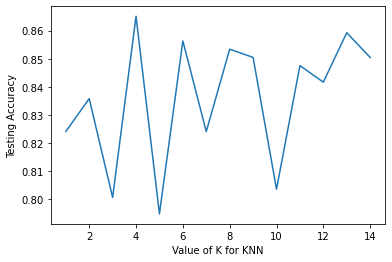

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Choosing the best parameter for KNN
k_range = list(range(1, 15))
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(x_train, y_train)
 y_pred_knn = knn.predict(x_test)
 scores.append(metrics.accuracy_score(y_test, y_pred_knn))
    
# Plotting the best parameter
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [46]:
# Training model
knn = KNeighborsClassifier(n_neighbors = 7)
model_knn = knn.fit(x_train,y_train)

In [47]:
# save model ke pickle

pickle.dump(model_knn,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/knn_k7.pkl','wb'))

In [48]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [49]:
np.array(y_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

## Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
# Training model
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)

In [52]:
# save model ke pickle

pickle.dump(model_lr,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/log_reg.pkl','wb'))

In [53]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [54]:
np.array(y_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)

In [57]:
# save model ke pickle

pickle.dump(model_dt,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/dt.pkl','wb'))

In [58]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

## Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Training model
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)

In [61]:
# save model ke pickle

pickle.dump(model_rf,open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/random_forest.pkl','wb'))

In [62]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [63]:
np.array(y_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

# model evaluation

In [64]:
from sklearn import metrics

print('Akurasi Naive Bayes:',metrics.accuracy_score(y_test,y_pred_nb))
print('Akurasi KNN:',metrics.accuracy_score(y_test,y_pred_knn))
print('Akurasi Logistic Regression:',metrics.accuracy_score(y_test,y_pred_lr))
print('Akurasi Decision Tree:',metrics.accuracy_score(y_test,y_pred_dt))
print('Akurasi Random Forest:',metrics.accuracy_score(y_test,y_pred_rf))

Akurasi Naive Bayes: 0.9325513196480938
Akurasi KNN: 0.8240469208211144
Akurasi Logistic Regression: 0.906158357771261
Akurasi Decision Tree: 0.9032258064516129
Akurasi Random Forest: 0.9208211143695014


In [65]:
# evaluasi dengan MSE
from sklearn.metrics import mean_squared_error

print('MSE Naive Bayes:',mean_squared_error(y_test,y_pred_nb))
print('MSE KNN:',mean_squared_error(y_test,y_pred_knn))
print('MSE Logistic Regression:',mean_squared_error(y_test,y_pred_lr))
print('MSE Random Forest:',mean_squared_error(y_test,y_pred_rf))

MSE Naive Bayes: 0.06744868035190615
MSE KNN: 0.17595307917888564
MSE Logistic Regression: 0.093841642228739
MSE Random Forest: 0.07917888563049853


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       172
           1       0.88      1.00      0.94       169

    accuracy                           0.93       341
   macro avg       0.94      0.93      0.93       341
weighted avg       0.94      0.93      0.93       341



In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       172
           1       0.74      0.98      0.85       169

    accuracy                           0.82       341
   macro avg       0.86      0.83      0.82       341
weighted avg       0.86      0.82      0.82       341



# Deployment

In [79]:
import pickle
from joblib import load
#Hasil
file_nb = pickle.load(open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/bernoulli_nb.pkl','rb'))
file_rf = pickle.load(open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/random_forest.pkl','rb'))
file_knn = pickle.load(open('D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/knn_k7.pkl','rb'))

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing(data_input)
print('')
print('hasil preprocessing:\n',data_input,'\n')

#Load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("D:/orbit_future_academy/Proyek Akhir/Dataset/data_scraping/model/selected_features.pkl", "rb"))))

hasil = file_nb.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
    s ="Hoax"
else:
    s ="Valid"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
Jakarta - Partai Golkar memuji penunjukan Zulkifli Hasan (Zulhas) sebagai Menteri Perdagangan (Mendag) dan Hadi Tjahjanto jadi Menteri ATR/BPN. Golkar menilai Ketua Umum PAN dan mantan Panglima TNI itu punya pengalaman dalam pemerintahan. Penilaian Golkar soal pemilihan Zulhas dan Hadi disampaikan Ketua DPP Golkar Ace Hasan Syadzily. Ace mulanya menyampaikan penilaian Golkar terhadap Zulhas.  "Kami yakin di bawah kepemimpinan beliau (Zulhas), berbagai permasalahan perdagangan dapat diatasi dengan baik, terutama tentang permasalahan minyak goreng," kata Ace kepada wartawan, Rabu (15/6/2022).   Ace menganggap keduanya sama-sama mempunyai kompetensi di masing-masing bidang, Zulhas di bidang perdagangan dan Hadi di pertanahan.  Baca juga: Cerita Hadi Selalu Duduk di Belakang Sofyan, Tak Nyangka Bisa Gantikan Posisi "Kedua figur tersebut sangat memiliki kompetensi dalam bidangnya masing-masing. Pak Zulkifli Hasan memiliki pengalaman dalam pemerintahan sebelumnya dan dini